# TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyses the TMDb database. With each section of code there are certain observations and comments included about what the code does. Some of the questions and analyses that this program attempts to answer are:

<ol><li>Descriptive analysis on the data set; i.e. maximum and minimum values for a given filter, histograms for runtimes and vote average, timeseries for the sum and average of runtime, profit, budget and revenue.</li>
<li>Insights on highly profitable films:
<ul><li>Most successful genres</li> 
<li>Most successful actors</li>
<li>Most successful directors</li></ul></li>
<li>The correlation between the vairables of the dataset to prove intuitive assumptions around profitability, popularity and vote average.</li></ol>

These questions may aid a production house in making decisions about movies to produce. It is important to note that these insights will be derived based on correlation between data points provided in this dataset. And correlation does not imply causation. 

In [1]:
#This cell of code imports all the libaries that we will require for exploring this dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#This cell of code reads the csv file and checks the data types of its columns. 

df = pd.read_csv('tmdb-movies.csv')
df.info()
df.duplicated().sum()
df.isnull().sum()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data Cleaning

In [3]:
#Observations:
    #1. All column labels appear to be consistent in terms of nomenclature.
    #2. All data types appear to be consistent and do not require any kind of conversion, with the exception of release_date.
    #3. release_date needs to be converted to a date-time object. 
    #4. There appears to be one duplicate row in the dataset. 
    #5. There appear to be multiple instances of NAN or null values in the data set - across 9 columns.
    #Addendum1: There are zeros appearing in the revenue and budget columns. 
    #Addendum2: There are a few columns that we won't be needing and these can be dropped. 
    #Addendum3: _adj will be used to compute the profit since these have been adjusted to a common base year.  
    
#This is a function to clean the data:
    #1. Convert release_date to a date-time object.
    #2. Remove duplicates.
    #3. Replace the 0s with NANs and remove all rows with NANs
    #4. Add an additional column called profit.
    
#Issues: 
    #1. _adj need to be convereted to int from float, since the output is currently displaying scientific numbers for these columns.
    #2. This is creating a problem where the revenue for some line items is showing up as negative. 
    #3. Unwanted columns need to be removed before all rows with 0s and NaNs are removed.
    #4. This will ensure that even those rows are with 0s and NaNs in unwanted columns are retained. 
    
#Args: the data frame object containing the contents of the csv file
#Returns: the updated data frame

def data_clean(df):
    df.drop(['imdb_id','popularity', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count'], axis = 1, inplace=True)
    df['release_date'] = pd.to_datetime(df['release_date'])
    df.drop_duplicates(inplace=True)
    col = ['budget_adj', 'revenue_adj', 'runtime']
    df[col] = df[col].replace(0, np.NAN)
    df.dropna(inplace = True)
    df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
   
    df.info()
    return df

In [4]:
data_clean(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
id                      3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
profit_adj              3805 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 416.2+ KB


,id,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,281957,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,87101,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,286217,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,211672,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
9,150540,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08


<a id='eda'></a>
## Exploratory Data Analysis
### Descriptive Analysis
The following section contains code to visualize plots and charts for the some of the variables in the dataset. Most of these have been written as functions that can deliver an output for multiple variables. 


In [5]:
#This function returns the maximum and minimum for runtime, profit, revenue, and budget.
#Args: a column name from runtime, budget_adj, revenue_adj, profit_adj
#Returns: the rows for the maximum and minimum values in that column

def max_min(col):
    df_tv1 = df[col].idxmax()
    df_tv2 = pd.DataFrame(df.loc[df_tv1])
    df_tv3 = df[col].idxmin()
    df_tv4 = pd.DataFrame(df.loc[df_tv3])
    return df_tv2, df_tv4

In [6]:
x = input("Please select from: 1. Runtime, 2. Profit, 3. Revenue, 4. Budget \n").lower()
if x == 'runtime':
    print(max_min(x))
elif x == 'profit' or x == 'revenue' or x == 'budget':
    print(max_min(x + '_adj'))
else:
    print("Please restart the program and enter one of the four options provided above.")

Please select from: 1. Runtime, 2. Profit, 3. Revenue, 4. Budget 
runtime
(                                                                   2107
id                                                                43434
original_title                                                   Carlos
cast                  Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                                Olivier Assayas
runtime                                                             338
genres                                     Crime|Drama|Thriller|History
production_companies  Egoli Tossell Film AG|Canal+|Arte France|Films...
release_date                                        2010-05-19 00:00:00
vote_average                                                        6.2
release_year                                                       2010
budget_adj                                                      1.8e+07
revenue_adj                                                  

In [7]:
#This is a function that creates a histogram for runtime and vote average.
#Args: a column name from runtime, vote_average

def run_histogram(col):
    plt.figure(figsize=(9,6))
    plt.ylabel('Number of movies', fontsize = 12)
    plt.xlabel('Your chosen filter', fontsize = 12)
    plt.title('A distribution of all the movies based on your filter', fontsize = 15)
    plt.hist(df[col], bins = 20);

Please select from: 1. Runtime, 2. Vote Average 
runtime


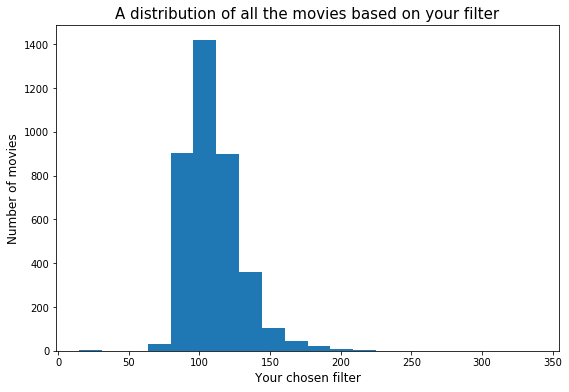

In [8]:
x = input("Please select from: 1. Runtime, 2. Vote Average \n").lower()
if x == 'runtime':
    run_histogram(x)
elif x == 'vote average':
    run_histogram('vote_average')
else:
    print("Please restart the program and enter one of the two options provided above. \n")

In [9]:
#Observations:
#1. Both the distributions appear to be normal.
#2. The median for run time is between 100 and 110 minutes, while the median for vote average is between 6 and 7.
#3. Outliers can be seen for the runtime on the right and for vote average on the left. 

In [10]:
#This is a function that creates a timeseries for runtime, profit, and revenue.   
#Args: a column name from runtime, profit_adj, revenue_adj, and a variable specifying the type of view

def run_timeseries(col, y):
    plt.figure(figsize=(9,6))
    plt.xlabel('Release year', fontsize = 12)
    plt.ylabel('Your chosen filter', fontsize = 12)
    plt.title('A trend of your filter over the years', fontsize = 15)
    if y == 'sum':
        plt.plot(df.groupby('release_year')[col].sum())
    elif y == 'mean':
        plt.plot(df.groupby('release_year')[col].mean())

Please select from: 1. Runtime, 2. Profit, 3. Revenue 
runtime
Do you want to see a timeseries for the sum or mean of your chosen filter above? 
sum


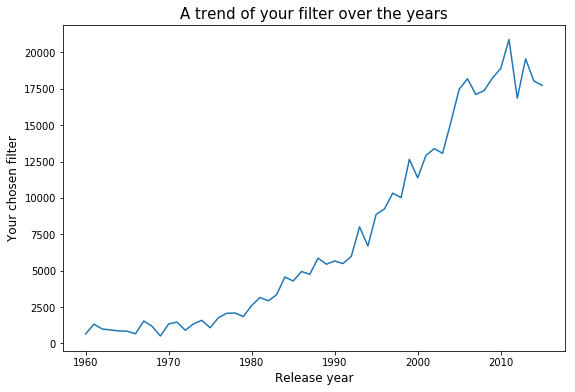

In [11]:
x = input("Please select from: 1. Runtime, 2. Profit, 3. Revenue \n").lower()
y = input("Do you want to see a timeseries for the sum or mean of your chosen filter above? \n").lower()

if x == 'runtime':
    run_timeseries(x, y)
elif x == 'profit' or x == 'revenue' or x == 'budget':
    run_timeseries(x + '_adj', y)
else:
    print("Please restart the program and enter one of the three options provided above. \n")

In [12]:
#Observations:
#1. It can be seen that the average runtime for movies in the new millennium stays well below the ceiling of 115 minutes. 
#2. While the total profits from the movies in the dataset have gone up over the years, the mean is lesser than what it used to be in the 60s and 70s.
#3. This could be because of the higher number of movies being released per year in the new millennium. 
#4. This can also be corroborated from the timeseries of the mean of revenue. 

### Insights on 'Highly Profitable' Films
The following section contains code deliver insights on commercially successful films. Some of these conclusions are documented at the end of this file. It is important to note that the no statistical tests have been performed; the conclusions are insights are based purely on the correlation between variables in this dataset - which does not imply causation. 

In [13]:
#This function breaks the data into four groups based on profitability.
#The objective is to look at that subset of data and determine: the most bankable star, director, and genre.
#Args: the data frame object containing the contents of the csv file

def profit_levels(df):
    df['profit_adj'].describe()
    bin_edges = [ -4.139124e+08,  -1.420000e+06,  2.851334e+07, 1.090266e+08, 2.750138e+09]
    bin_names = ['Loss making', 'Cost recovered', 'Moderately profitable', 'Highly profitable']
    df['profit_level'] = pd.cut(df['profit_adj'], bin_edges, labels=bin_names)
    return df

In [14]:
profit_levels(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
profit_adj              3805 non-null float64
profit_level            3804 non-null category
dtypes: category(1), datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 580.1+ KB


In [19]:
#This function takes a column - genre or director - and returns the count of 'highly profitable' films that belong to that column.
#Args: a column name from director, cast, genre or prodcution_companies 
#Returns: top 5 directors, actors, genres, production companies - by count of 'highly profitable' films

def pipe_split(col):
    df_tv5 = df[df['profit_level'] == 'Highly profitable']
    df_tv6 = df_tv5[col].str.cat(sep = '|')
    df_tv6 = pd.Series(df_tv6.split('|'))
    count = df_tv6.value_counts(ascending = False)
    return count.nlargest(5)

In [20]:
x = input("Please select from: 1. Director, 2. Cast, 3. Genres 4. Production companies \n").lower()
if x != 'production companies':
    print(pipe_split(x))
elif x == 'production companies':
    print(pipe_split('production_companies'))

Please select from: 1. Director, 2. Cast, 3. Genres 4. Production companies 
genres
Action       361
Comedy       333
Drama        327
Adventure    312
Thriller     279
dtype: int64


In [29]:
df.corr()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj,profit_adj
id,1.000000,-0.036166,-0.000700,0.491245,-0.126589,-0.089921,-0.070913
runtime,-0.036166,1.000000,0.359173,-0.113488,0.333453,0.279733,0.234491
vote_average,-0.000700,0.359173,1.000000,-0.135646,0.035798,0.268227,0.290195
release_year,0.491245,-0.113488,-0.135646,1.000000,0.078378,-0.101931,-0.131448
budget_adj,-0.126589,0.333453,0.035798,0.078378,1.000000,0.567983,0.401797
revenue_adj,-0.089921,0.279733,0.268227,-0.101931,0.567983,1.000000,0.981896
profit_adj,-0.070913,0.234491,0.290195,-0.131448,0.401797,0.981896,1.000000


<a id='conclusions'></a>
## Conclusions

1. It is important to note that no statistical tests have been performed on this data set. 
2. The objective of this code is to show the releationships that exist between variables that might help a production house conduct further analysis to make decisions.
3. There are 344 movies which have been classified as highly profitable. This is a subset of the original data with the profit_adj cut-off in the fourth quartile.  
4. From the data set provided, the following can be concluded: <br />
    a. Most bankable directors: Steven Spielberg, Peter Jackson, Christopher Nolan <br />
    b. Most bankable genres: Action, Adventure, Thriller <br />
    c. Most bankable actors: Sean Connery, Tom Cruise, Matt Damon <br />
    This is based on the number of highly profitable movies that each of these groups have delivered. 
5. There appears to be very weak corelation between all the variables. One can thus conclude that a big budget film doesn't necessarity mean a highly profitable film. 

<a id='limitations'></a>
## Limitations
<ol>
<li>It would be intuitive to assume the following:
<ul><li>A strong correlation exists between highly profitable films and vote average; i.e. a highly profitable film would imply a highly popular film and hence a higher vote average.</li>
<li>A strong correlation exists between revenue and vote average; i.e. a top grossing movie would imply popularity and hence a higher vote average.</li>
<li>A stronger correlation between budget and revenue; i.e. a big budget film would mean more marketing spend and hence a strong revenue collection.</li></ul>
<li>Unfortunately, none of these insights and conclusions can be drawn from the dataset provided. This can be seen from the weak correlation between the variables.
<li>Another limitation of this dataset is popularity; this measure is undefined and the range of values that this column contains is fairly large.</li>
<li>The data type of the revenue and budget columns is float; this is creating an issue where scientific numbers are being displayed on charts and plots - which is difficult to read and comprehend.</li>
<li>Revenue and profitability also depends on a lot of other factors, such as the number of screens the film is released on, other platorms - such as Netflix, Prime - where it is released, its marketing spend, the geographies it is released in, etc. </li> 
<li>Key markets such as China and India often play a role in the commercial success or failure of films. A recent example would be Warcraft: The Beginning which failed in the US but exceeded all expectations in China, even overtaking box office collections of Star Wars <a href="https://www.bbc.com/news/world-asia-china-36524703">(click here)</a>. These factors are not covered in this dataset.</li>
<li>As a closing comment, the orginal dataset has 10,866 entries; after cleaning this data for duplicates and null values, we are left with 3,805 entries. This is a significant reduction in size from the orginal dataset. It is critical to note that the results will vary for larger and more comprehensive datasets - with clean data. Perhaps, the Holy Grail of intuitions we were hoping to find in point 1 might also become more pronounced and evident with such a dataset.</li></ol>